### Import Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading the Dataset

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")

### Basic Dataset Operations

In [3]:
display(df.head())
display(df.tail())

display("Shape: ", df.shape)
display("Null Counts:", df.isnull().sum())

display("DataTypes:", df.dtypes)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


'Shape: '

(13320, 9)

'Null Counts:'

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

'DataTypes:'

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

- Checking Unique data (column-wise)

In [4]:
display(df.nunique())

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

- Info of Dataset

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB
None


### Cleaning and Preprocessing of Dataset

- Rename the Columns in a proper way

In [6]:
df.rename(columns={
    'size' : "bhk" 
}, inplace = True)

In [7]:
df.head()

,area_type,availability,location,bhk,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


- Droping the Unnecessary Columns

In [8]:
df = df.drop(columns=["society"])

- Converting the columns in a proper data-types

In [9]:
def convert_size_to_int(bhk):
    if isinstance(bhk, str):
        parts = bhk.split(' ')
        if len(parts) > 1 and parts[0].isdigit():
            return int(parts[0])
    return None

df['bhk'] = df['bhk'].apply(convert_size_to_int)
df['bhk'] = df['bhk'].fillna(df['bhk'].median())


def convert_sqft_to_num(x):
    try:
        float(x)
        return float(x)
    except:
        if isinstance(x, str):
            tokens = x.split('-')
            if len(tokens) == 2:
                return (float(tokens[0]) + float(tokens[1])) / 2
    return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df['total_sqft'] = df['total_sqft'].fillna(df['total_sqft'].median())

In [10]:
df.head()

,area_type,availability,location,bhk,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200.0,2.0,1.0,51.00


- Checking the null counts

In [11]:
df.isnull().sum()

area_type         0
availability      0
location          1
bhk               0
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

- Managing the null values

In [12]:
df['location'] = df['location'].fillna(df['location'].mode()[0])
df['bath'] = df['bath'].fillna(df['bath'].median())
df['balcony'] = df['balcony'].fillna(df['balcony'].median())

- Verifing the null counts

In [13]:
df.isnull().sum()

area_type       0
availability    0
location        0
bhk             0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

- Identify numeric and categorical features

In [14]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: ['bhk', 'total_sqft', 'bath', 'balcony', 'price']
Categorical columns: ['area_type', 'availability', 'location']


In [15]:
df = pd.get_dummies(df, columns=['area_type', 'balcony'], dtype=int)
display(df.head())

,availability,location,bhk,total_sqft,bath,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,balcony_0.0,balcony_1.0,balcony_2.0,balcony_3.0
0,19-Dec,Electronic City Phase II,2.0,1056.0,2.0,39.07,0,0,0,1,0,1,0,0
1,Ready To Move,Chikka Tirupathi,4.0,2600.0,5.0,120.00,0,0,1,0,0,0,0,1
2,Ready To Move,Uttarahalli,3.0,1440.0,2.0,62.00,1,0,0,0,0,0,0,1
3,Ready To Move,Lingadheeranahalli,3.0,1521.0,3.0,95.00,0,0,0,1,0,1,0,0
4,Ready To Move,Kothanur,2.0,1200.0,2.0,51.00,0,0,0,1,0,1,0,0


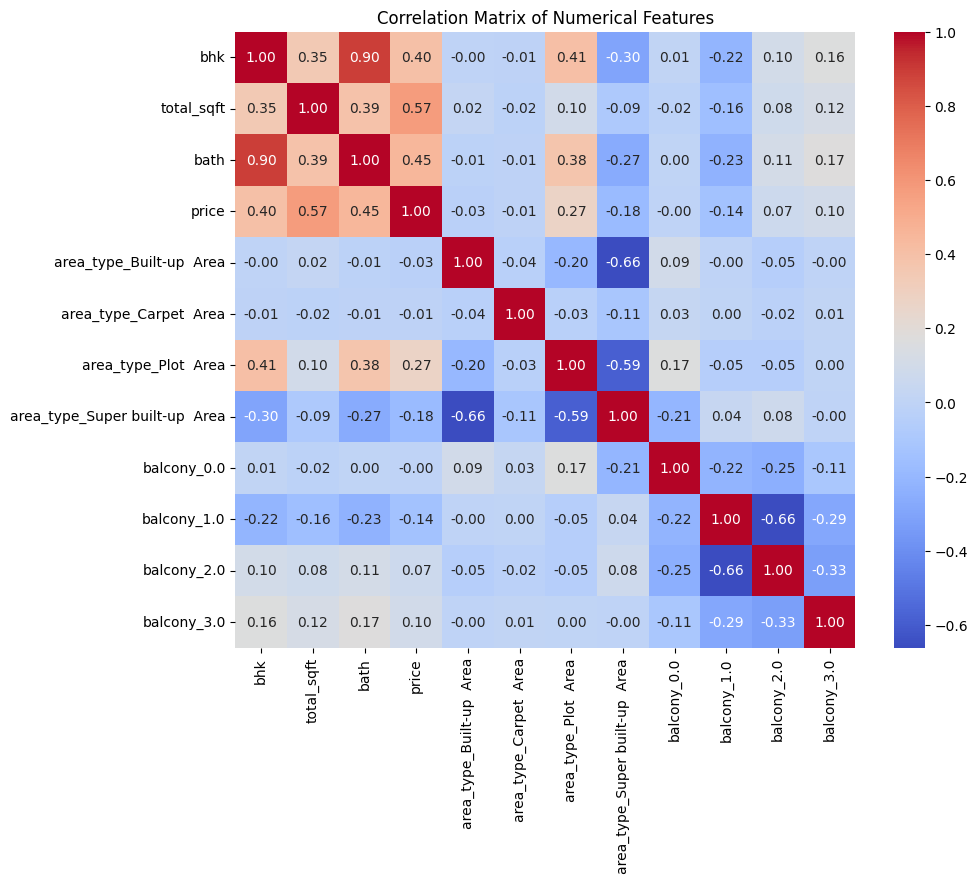

In [16]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [17]:
# Reduce cardinality by grouping rare locations
location_counts = df['location'].value_counts()
rare_locations = location_counts[location_counts <= 15].index
df['location'] = df['location'].apply(lambda x: 'Other' if x in rare_locations else x)

In [18]:
df.nunique()

availability                        81
location                           181
bhk                                 19
total_sqft                        1999
bath                                19
price                             1994
area_type_Built-up  Area             2
area_type_Carpet  Area               2
area_type_Plot  Area                 2
area_type_Super built-up  Area       2
balcony_0.0                          2
balcony_1.0                          2
balcony_2.0                          2
balcony_3.0                          2
dtype: int64

In [19]:
# Use one-hot encoding for reduced location categories
df = pd.get_dummies(df, columns=['location'], dtype=int)

In [20]:
df.head()

,availability,bhk,total_sqft,bath,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,balcony_0.0,...,location_Uttarahalli,location_Varthur,location_Vidyaranyapura,location_Vijayanagar,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yeshwanthpur
0,19-Dec,2.0,1056.0,2.0,39.07,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Ready To Move,4.0,2600.0,5.0,120.00,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ready To Move,3.0,1440.0,2.0,62.00,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Ready To Move,3.0,1521.0,3.0,95.00,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Ready To Move,2.0,1200.0,2.0,51.00,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df.rename(columns={
    'area_type_Built-up  Area': 'Built_up_Area',
    'area_type_Carpet  Area': 'Carpet_Area',
    'area_type_Plot  Area': 'Plot_Area',
    'area_type_Super built-up  Area': 'Super_built_up_Area'
}, inplace=True)

In [22]:
print(df.columns.tolist())

['availability', 'bhk', 'total_sqft', 'bath', 'price', 'Built_up_Area', 'Carpet_Area', 'Plot_Area', 'Super_built_up_Area', 'balcony_0.0', 'balcony_1.0', 'balcony_2.0', 'balcony_3.0', 'location_1st Phase JP Nagar', 'location_2nd Stage Nagarbhavi', 'location_5th Phase JP Nagar', 'location_6th Phase JP Nagar', 'location_7th Phase JP Nagar', 'location_8th Phase JP Nagar', 'location_9th Phase JP Nagar', 'location_Abbigere', 'location_Akshaya Nagar', 'location_Ambalipura', 'location_Ambedkar Nagar', 'location_Amruthahalli', 'location_Anandapura', 'location_Ananth Nagar', 'location_Anekal', 'location_Anjanapura', 'location_Ardendale', 'location_Arekere', 'location_Attibele', 'location_BTM 2nd Stage', 'location_BTM Layout', 'location_Babusapalaya', 'location_Balagere', 'location_Banashankari', 'location_Banashankari Stage II', 'location_Banashankari Stage III', 'location_Banashankari Stage VI', 'location_Banaswadi', 'location_Bannerghatta', 'location_Bannerghatta Road', 'location_Basavangudi',

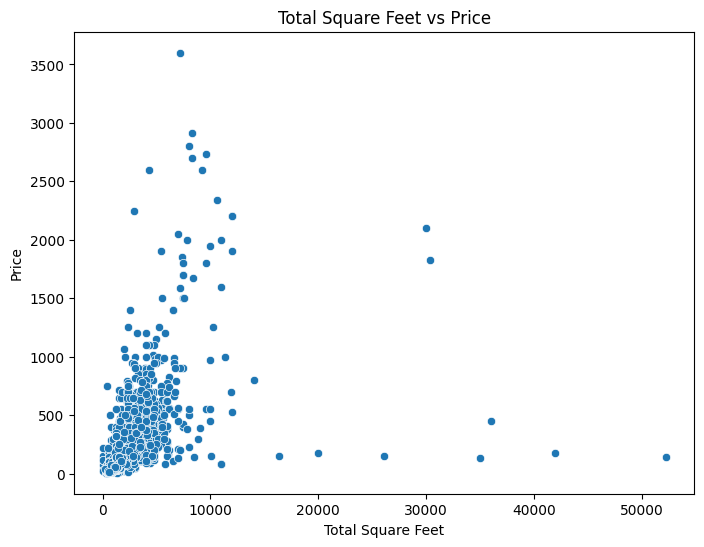

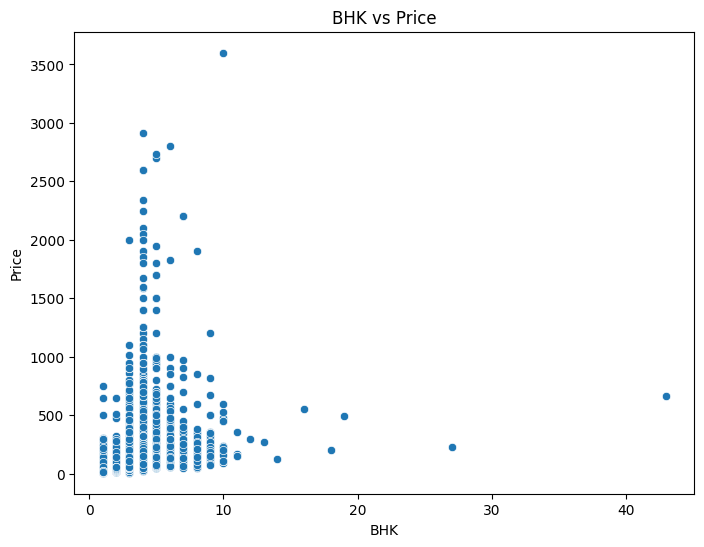

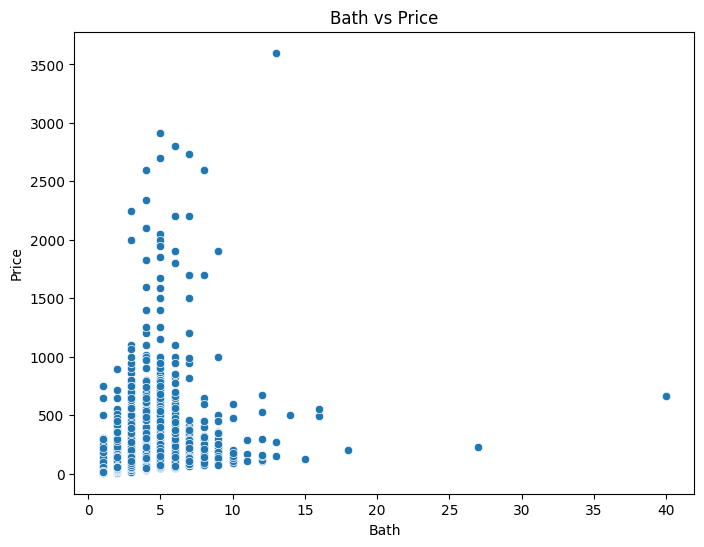

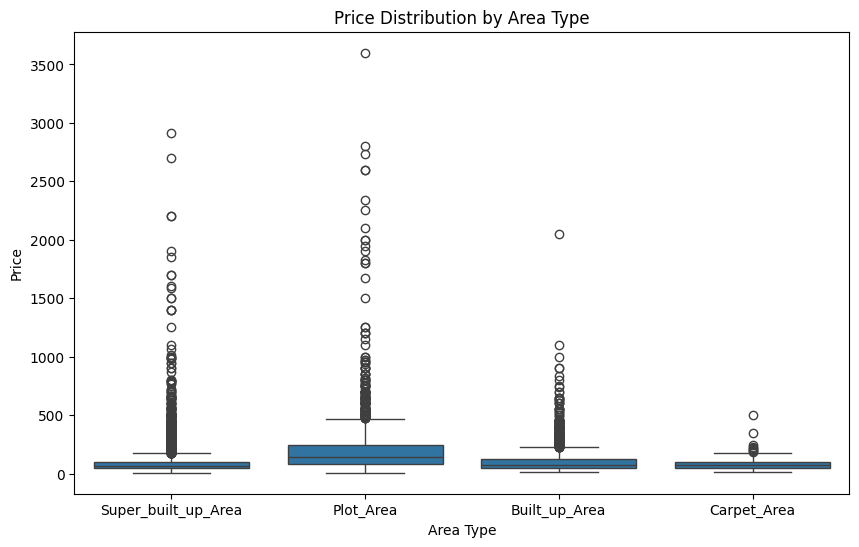

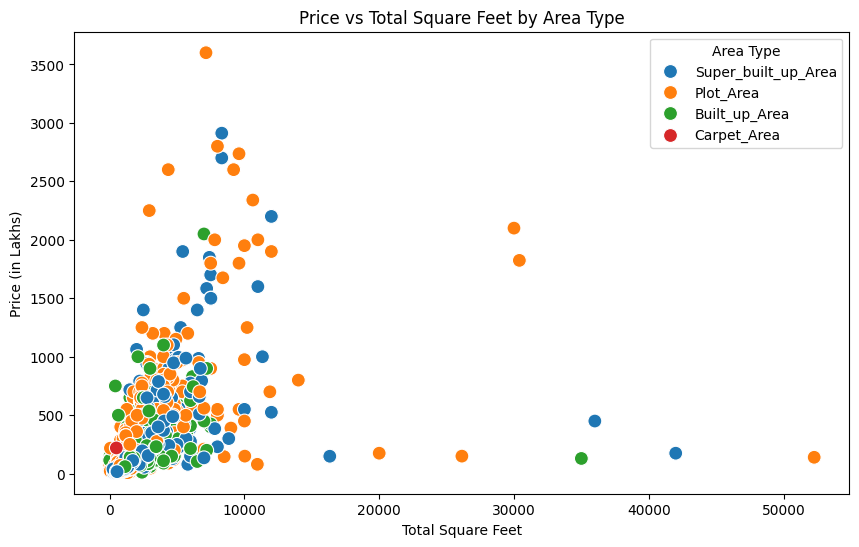

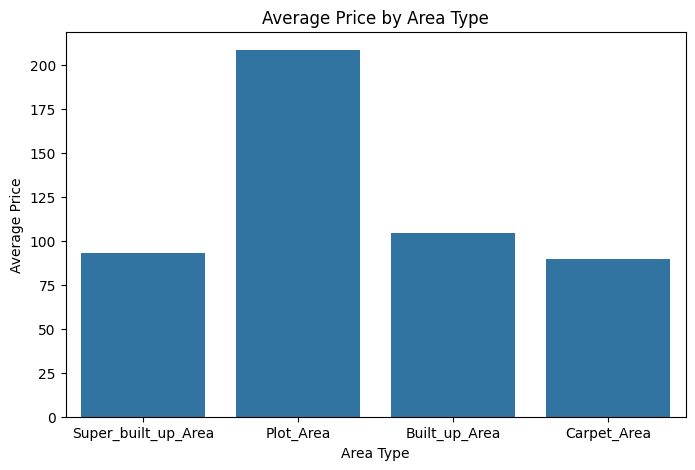

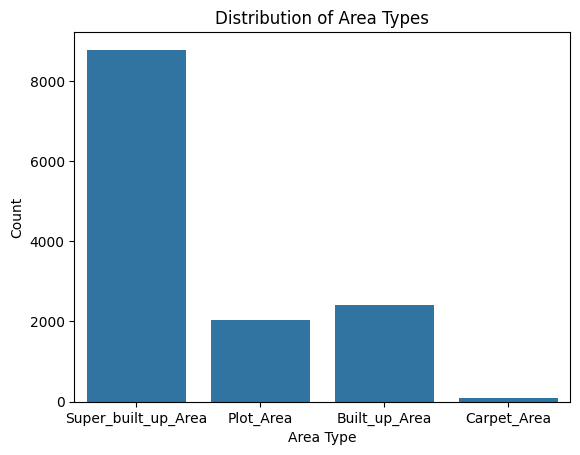

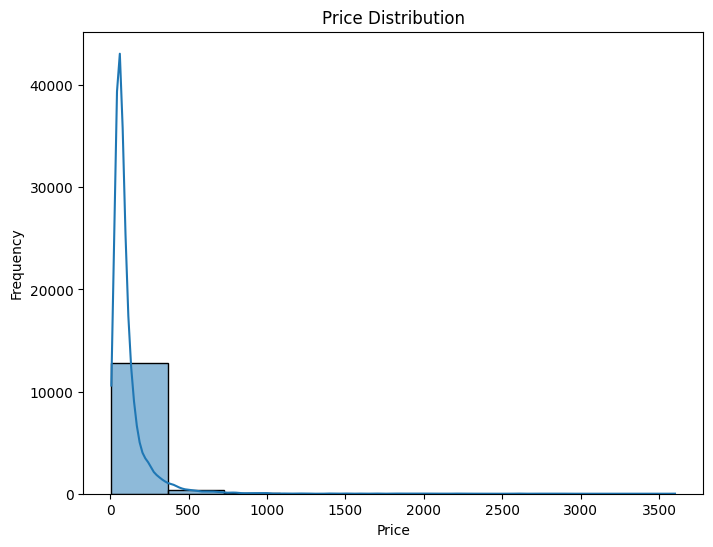

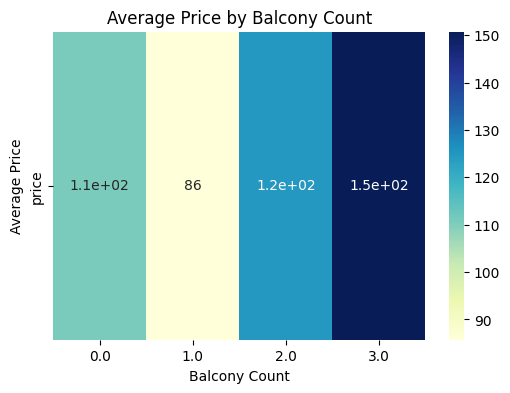

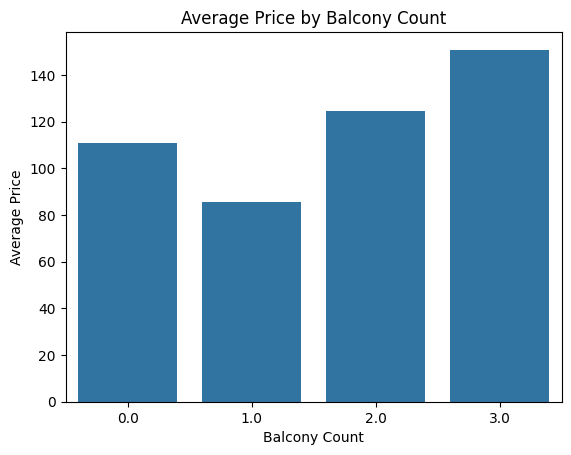

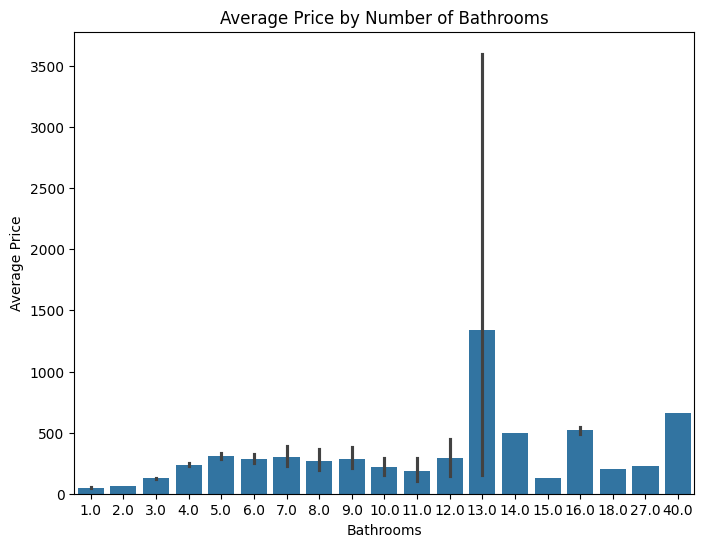

In [23]:
# Total Square Feet vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='total_sqft', y='price')
plt.title('Total Square Feet vs Price')
plt.xlabel('Total Square Feet')
plt.ylabel('Price')
plt.show()

# BHK vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bhk', y='price')
plt.title('BHK vs Price')
plt.xlabel('BHK')
plt.ylabel('Price')
plt.show()

# Bath vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bath', y='price')
plt.title('Bath vs Price')
plt.xlabel('Bath')
plt.ylabel('Price')
plt.show()

area_types = ['Built_up_Area', 'Carpet_Area', 'Plot_Area', 'Super_built_up_Area']

# Function to get area type
def get_area_type(row):
    for area in area_types:
        if row[area] == 1:
            return area.replace('area_type_','')
    return 'Unknown'

# Apply the function to create new column
df['area_type'] = df.apply(get_area_type, axis=1)

# Price Distribution by Area Type
plt.figure(figsize=(10,6))
sns.boxplot(x='area_type', y='price', data=df)
plt.title('Price Distribution by Area Type')
plt.xlabel('Area Type')
plt.ylabel('Price')
plt.show()

# Price vs Total Square Feet by Area Type
plt.figure(figsize=(10,6))
sns.scatterplot(x='total_sqft', y='price', hue='area_type', data=df, s=100)
plt.title('Price vs Total Square Feet by Area Type')
plt.xlabel('Total Square Feet')
plt.ylabel('Price (in Lakhs)')
plt.legend(title='Area Type')
plt.show()

# Average Price by Area Type
plt.figure(figsize=(8,5))
sns.barplot(x='area_type', y='price', data=df, ci=None)
plt.title('Average Price by Area Type')
plt.xlabel('Area Type')
plt.ylabel('Average Price')
plt.show()

# Distribution of Area Types
sns.countplot(x='area_type', data=df)
plt.title('Distribution of Area Types')
plt.xlabel('Area Type')
plt.ylabel('Count')
plt.show()

# Price Distribution
plt.figure(figsize=(8,6))
sns.histplot(df['price'], bins=10, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

balcony_cols = ['balcony_0.0', 'balcony_1.0', 'balcony_2.0', 'balcony_3.0']
df['balcony_count'] = df[balcony_cols].idxmax(axis=1).str.extract('balcony_(\\d\\.\\d)').astype(float)
pivot = df.groupby('balcony_count')['price'].mean().reset_index()

# Average Price by Balcony Count
plt.figure(figsize=(6,4))
sns.heatmap(pivot.set_index('balcony_count').T, annot=True, cmap='YlGnBu')
plt.title('Average Price by Balcony Count')
plt.xlabel('Balcony Count')
plt.ylabel('Average Price')
plt.show()

# Average Price by Balcony Count
sns.barplot(x='balcony_count', y='price', data=pivot)
plt.title('Average Price by Balcony Count')
plt.xlabel('Balcony Count')
plt.ylabel('Average Price')
plt.show()

# Average Price by Number of Bathrooms
plt.figure(figsize=(8,6))
sns.barplot(x='bath', y='price', data=df, estimator='mean')
plt.title('Average Price by Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Average Price')
plt.show()

In [24]:
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']
df['bath_per_size'] = df['bath'] / df['bhk']

display(df.head())

,availability,bhk,total_sqft,bath,price,Built_up_Area,Carpet_Area,Plot_Area,Super_built_up_Area,balcony_0.0,...,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yeshwanthpur,area_type,balcony_count,price_per_sqft,bath_per_size
0,19-Dec,2.0,1056.0,2.0,39.07,0,0,0,1,0,...,0,0,0,0,0,0,Super_built_up_Area,1.0,3699.810606,1.000000
1,Ready To Move,4.0,2600.0,5.0,120.00,0,0,1,0,0,...,0,0,0,0,0,0,Plot_Area,3.0,4615.384615,1.250000
2,Ready To Move,3.0,1440.0,2.0,62.00,1,0,0,0,0,...,0,0,0,0,0,0,Built_up_Area,3.0,4305.555556,0.666667
3,Ready To Move,3.0,1521.0,3.0,95.00,0,0,0,1,0,...,0,0,0,0,0,0,Super_built_up_Area,1.0,6245.890861,1.000000
4,Ready To Move,2.0,1200.0,2.0,51.00,0,0,0,1,0,...,0,0,0,0,0,0,Super_built_up_Area,1.0,4250.000000,1.000000


In [25]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['price', 'availability'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (10656, 196)
Shape of X_test: (2664, 196)
Shape of y_train: (10656,)
Shape of y_test: (2664,)


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [27]:
X_train = X_train.drop(columns=['area_type'])
X_test = X_test.drop(columns=['area_type'])

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
# Evaluate Linear Regression Model
y_pred_lr = linear_regression_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Model Performance:")
print(f"  RMSE: {rmse_lr:.2f}")
print(f"  MAE: {mae_lr:.2f}")
print(f"  R²: {r2_lr:.2f}")

# Evaluate Decision Tree Model
y_pred_dt = decision_tree_model.predict(X_test)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nDecision Tree Model Performance:")
print(f"  RMSE: {rmse_dt:.2f}")
print(f"  MAE: {mae_dt:.2f}")
print(f"  R²: {r2_dt:.2f}")

# Evaluate Random Forest Model
y_pred_rf = random_forest_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Model Performance:")
print(f"  RMSE: {rmse_rf:.2f}")
print(f"  MAE: {mae_rf:.2f}")
print(f"  R²: {r2_rf:.2f}")

Linear Regression Model Performance:
  RMSE: 97.50
  MAE: 41.13
  R²: 0.55

Decision Tree Model Performance:
  RMSE: 23.46
  MAE: 3.56
  R²: 0.97

Random Forest Model Performance:
  RMSE: 18.56
  MAE: 2.22
  R²: 0.98


In [29]:
print("Model Performance Comparison:")
print("----------------------------------")
print(f"Linear Regression: RMSE = {rmse_lr:.2f}, MAE = {mae_lr:.2f}, R² = {r2_lr:.2f}")
print(f"Decision Tree    : RMSE = {rmse_dt:.2f}, MAE = {mae_dt:.2f}, R² = {r2_dt:.2f}")
print(f"Random Forest    : RMSE = {rmse_rf:.2f}, MAE = {mae_rf:.2f}, R² = {r2_rf:.2f}")

print("\nBest Performing Model:")
if rmse_rf < rmse_dt and rmse_rf < rmse_lr:
    print("Random Forest Model (lowest RMSE and MAE, highest R²)")
elif rmse_dt < rmse_rf and rmse_dt < rmse_lr:
    print("Decision Tree Model (lower RMSE and MAE, higher R² compared to Linear Regression)")
else:
    print("Linear Regression Model (lowest RMSE and MAE, highest R²)")

Model Performance Comparison:
----------------------------------
Linear Regression: RMSE = 97.50, MAE = 41.13, R² = 0.55
Decision Tree    : RMSE = 23.46, MAE = 3.56, R² = 0.97
Random Forest    : RMSE = 18.56, MAE = 2.22, R² = 0.98

Best Performing Model:
Random Forest Model (lowest RMSE and MAE, highest R²)


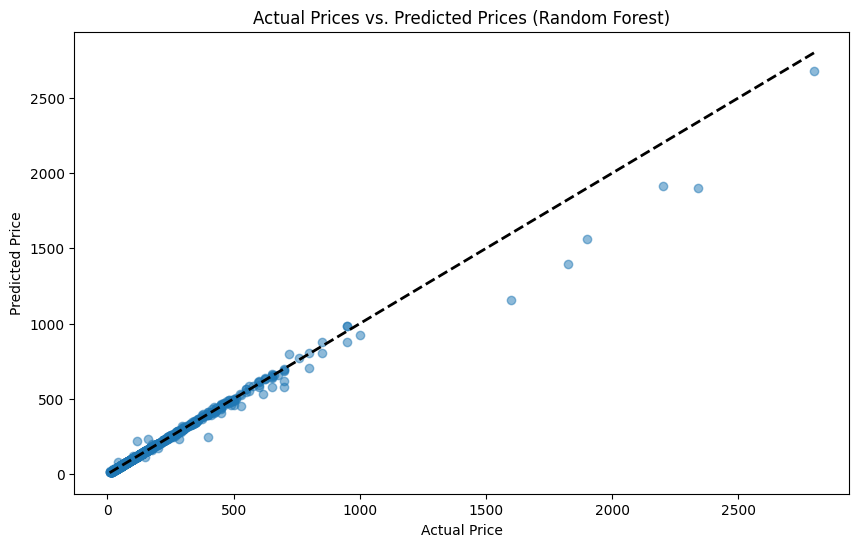

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual Prices vs. Predicted Prices (Random Forest)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [31]:
y_pred_rf = random_forest_model.predict(X_test)

In [32]:
importances = random_forest_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
top_features = feature_importance_df.sort_values(by='importance', ascending=False).head(5)

print("\nTop 5 Features Impacting Price (Random Forest Model):")
display(top_features)


Top 5 Features Impacting Price (Random Forest Model):


,feature,importance
1,total_sqft,0.549912
193,price_per_sqft,0.437936
0,bhk,0.002356
2,bath,0.002230
194,bath_per_size,0.001779


In [33]:
def preprocess_input_for_prediction(raw_input, feature_columns, 
                                    locations_list, area_types_list, balcony_values):
    # Initialize data with zeros
    data = dict.fromkeys(feature_columns, 0)
    
    # Fill numeric features
    data['bhk'] = raw_input.get('bhk', 0)
    data['total_sqft'] = raw_input.get('total_sqft', 0)
    data['bath'] = raw_input.get('bath', 0)
    
    # Deal with balcony encoding: Find the right balcony column
    balcony_count = raw_input.get('balcony', 0)
    balcony_col_name = f'balcony_{float(balcony_count)}'
    if balcony_col_name in feature_columns:
        data[balcony_col_name] = 1
    else:
        # fallback if exact balcony count not found
        pass
    
    # One-hot encode location
    loc = raw_input.get('location', 'Other')
    loc_col = 'location_' + loc
    if loc_col in feature_columns:
        data[loc_col] = 1
    else:
        data['location_Other'] = 1  # fallback
    
    # One-hot encode area_type
    area = raw_input.get('area_type', 'Super_built_up_Area')
    area_col = area
    if area_col in feature_columns:
        data[area_col] = 1
    else:
        # fallback or leave all zero if unknown
        pass
    
    # Convert to DataFrame
    df_input = pd.DataFrame([data])
    return df_input

In [34]:
# Your lists of features (from training)
feature_columns = X_train.columns.tolist()

# Extract these lists once from your data or feature names
locations_list = [col.replace('location_', '') for col in feature_columns if col.startswith('location_')]
area_types_list = ['Built_up_Area','Carpet_Area','Plot_Area','Super_built_up_Area']
balcony_values = [0.0, 1.0, 2.0, 3.0]

# Raw input example
raw_input = {
    'bhk': 3,
    'total_sqft': 1500,
    'bath': 2,
    'balcony': 1.0,
    'location': 'Whitefield',
    'area_type': 'Plot_Area'
}

# Preprocess
input_for_prediction = preprocess_input_for_prediction(raw_input, feature_columns, locations_list, area_types_list, balcony_values)

# Predict
predicted_price = random_forest_model.predict(input_for_prediction)
print(f"Predicted Price: {predicted_price[0]:.2f} Lakhs")

Predicted Price: 19.73 Lakhs


In [35]:
import joblib
joblib.dump(random_forest_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [36]:
joblib.dump(X_train.columns.tolist(), 'feature_columns.pkl')

['feature_columns.pkl']

In [37]:
df.columns.to_list()

['availability',
 'bhk',
 'total_sqft',
 'bath',
 'price',
 'Built_up_Area',
 'Carpet_Area',
 'Plot_Area',
 'Super_built_up_Area',
 'balcony_0.0',
 'balcony_1.0',
 'balcony_2.0',
 'balcony_3.0',
 'location_1st Phase JP Nagar',
 'location_2nd Stage Nagarbhavi',
 'location_5th Phase JP Nagar',
 'location_6th Phase JP Nagar',
 'location_7th Phase JP Nagar',
 'location_8th Phase JP Nagar',
 'location_9th Phase JP Nagar',
 'location_Abbigere',
 'location_Akshaya Nagar',
 'location_Ambalipura',
 'location_Ambedkar Nagar',
 'location_Amruthahalli',
 'location_Anandapura',
 'location_Ananth Nagar',
 'location_Anekal',
 'location_Anjanapura',
 'location_Ardendale',
 'location_Arekere',
 'location_Attibele',
 'location_BTM 2nd Stage',
 'location_BTM Layout',
 'location_Babusapalaya',
 'location_Balagere',
 'location_Banashankari',
 'location_Banashankari Stage II',
 'location_Banashankari Stage III',
 'location_Banashankari Stage VI',
 'location_Banaswadi',
 'location_Bannerghatta',
 'location_B